In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_2019 = "..\data\obitos-2019.csv"
path_2020 = "..\data\obitos-2020.csv"
path_2021 = "..\data\obitos-2021.csv"

data_2019 = pd.read_csv(path_2019)
data_2020 = pd.read_csv(path_2020)
data_2021 = pd.read_csv(path_2021)

print(f"2019 - {data_2019.shape}")
print(f"2020 - {data_2020.shape}")
print(f"2021 - {data_2021.shape}")

2019 - (12380, 6)
2020 - (14872, 6)
2021 - (2719, 6)


In [31]:
data_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [32]:
data_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
494,PA,INDETERMINADA,OUTRO,< 9,F,1
1167,DF,COVID,HOSPITAL,10 - 19,M,2
11761,AC,INSUFICIENCIA_RESPIRATORIA,HOSPITAL,90 - 99,M,10
6258,PR,PNEUMONIA,DOMICILIO,50 - 59,M,17
5104,SC,PNEUMONIA,DOMICILIO,40 - 49,F,2


In [33]:
data_2021.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
2681,GO,OUTRAS,HOSPITAL,N/I,M,2
1604,MG,OUTRAS,OUTROS_SERVICOS_SAUDE,70 - 79,F,1
1337,RJ,PNEUMONIA,OUTROS_SERVICOS_SAUDE,60 - 69,M,3
236,MT,COVID,HOSPITAL,20 - 29,F,1
894,PA,OUTRAS,DOMICILIO,50 - 59,M,1


In [34]:
print(len(data_2019["uf"].unique()))
print(len(data_2020["uf"].unique()))
print(len(data_2021["uf"].unique()))

27
27
27


In [35]:
data_2019["tipo_doenca"].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [36]:
data_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [37]:
data_2021["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INSUFICIENCIA_RESPIRATORIA', 'SEPTICEMIA',
       'PNEUMONIA', 'SRAG', 'INDETERMINADA'], dtype=object)

In [38]:
data_2019["tipo_doenca"].value_counts()

OUTRAS                        3845
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2323
SEPTICEMIA                    2063
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [39]:
data_2020["tipo_doenca"].value_counts()

OUTRAS                        3789
INSUFICIENCIA_RESPIRATORIA    2329
PNEUMONIA                     2210
COVID                         2104
SEPTICEMIA                    2024
INDETERMINADA                 1338
SRAG                          1078
Name: tipo_doenca, dtype: int64

In [40]:
data_2021["tipo_doenca"].value_counts()

OUTRAS                        1067
COVID                          416
SEPTICEMIA                     378
PNEUMONIA                      372
INSUFICIENCIA_RESPIRATORIA     332
SRAG                            89
INDETERMINADA                   65
Name: tipo_doenca, dtype: int64

----
## Desafio 01: Acesse o portal da transparência e leia sobre como são feitas as classificações por tipo de óbito e como são obtidos os dados.

In [41]:
print(data_2019['local_obito'].unique().tolist())
print(data_2020['local_obito'].unique().tolist())
print(data_2021['local_obito'].unique().tolist())

['DOMICILIO', 'HOSPITAL', 'IGNORADO', 'OUTRO', 'VIA_PUBLICA', 'OUTROS_SERVICOS_SAUDE', 'AMBULANCIA', 'POSTO_SAUDE', 'SAMU']
['DOMICILIO', 'HOSPITAL', 'OUTRO', 'OUTROS_SERVICOS_SAUDE', 'VIA_PUBLICA', 'IGNORADO', 'AMBULANCIA', 'POSTO_SAUDE', 'SAMU']
['HOSPITAL', 'DOMICILIO', 'OUTROS_SERVICOS_SAUDE', 'IGNORADO', 'OUTRO', 'VIA_PUBLICA', 'POSTO_SAUDE']


In [42]:
print(data_2019['faixa_etaria'].unique().tolist())
print(data_2020['faixa_etaria'].unique().tolist())
print(data_2021['faixa_etaria'].unique().tolist())

['< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100', 'N/I']
['< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100', 'N/I']
['< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100', 'N/I']


### Dicionário de dados:###
* uf: unidade da federação (uma das 27);
* tipo_doenca: doenca que provocou o óbito (COVID, SEPTICEMIA, PNEUMONIA, INSUFICIÊNCIA RESPIRATÓRIA, SRAG ou INDETERMINADA);
* local_obito: local do óbito ('DOMICILIO', 'HOSPITAL', 'IGNORADO', 'OUTRO', 'VIA_PUBLICA', 'OUTROS_SERVICOS_SAUDE', 'AMBULANCIA', 'POSTO_SAUDE' ou 'SAMU');
* faixa_etaria: faixa etária ('< 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', '> 100' ou 'N/I');
* sexo: M ou F;
* total: total de mortes do registro.

### Prazos###
A família tem até 24h após o falecimento para registrar o óbito em Cartório que, por sua vez, tem até cinco dias para efetuar o registro de óbito, e depois até oito dias para enviar o ato feito à Central Nacional de Informações do Registro Civil (CRC Nacional), que atualiza esta plataforma.

---
## Desafio 02: Nesta aula o Thiago quer fazer uma contagem dos números de casos, mas os dados não parecem corretos. Identifique o problema antes de seguir para o próximo vídeo e ajude a corrigir.

In [43]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12380 entries, 0 to 12379
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12380 non-null  object
 1   tipo_doenca   12380 non-null  object
 2   local_obito   12380 non-null  object
 3   faixa_etaria  12380 non-null  object
 4   sexo          12378 non-null  object
 5   total         12380 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 580.4+ KB


In [44]:
# a única coluna numérica é total, portanto, será a única somada
total_obitos_2019 = data_2019.groupby('tipo_doenca').sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6985
INSUFICIENCIA_RESPIRATORIA,100516
OUTRAS,659968
PNEUMONIA,226203
SEPTICEMIA,175439
SRAG,1498


In [45]:
# a única coluna numérica é total, portanto, será a única somada
total_obitos_2020 = data_2020.groupby('tipo_doenca').sum()
total_obitos_2020

,total
tipo_doenca,
COVID,193650
INDETERMINADA,9597
INSUFICIENCIA_RESPIRATORIA,98088
OUTRAS,683616
PNEUMONIA,180648
SEPTICEMIA,161559
SRAG,16429


In [46]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,193650.000000
INDETERMINADA,1.373944
INSUFICIENCIA_RESPIRATORIA,0.975845
OUTRAS,1.035832
PNEUMONIA,0.798610
SEPTICEMIA,0.920884
SRAG,10.967290


In [47]:
# a única coluna numérica é total, portanto, será a única somada
total_obitos_2021 = data_2021.groupby('tipo_doenca').sum()
total_obitos_2021

,total
tipo_doenca,
COVID,2956
INDETERMINADA,82
INSUFICIENCIA_RESPIRATORIA,753
OUTRAS,5594
PNEUMONIA,1379
SEPTICEMIA,1371
SRAG,144


----

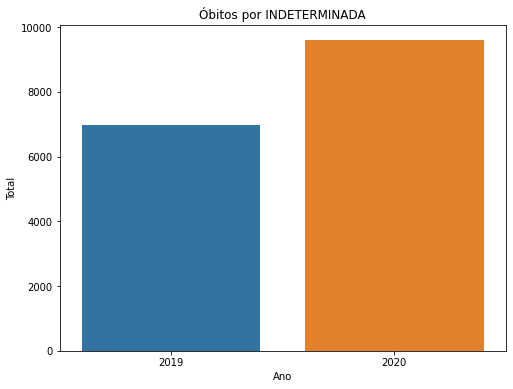

In [48]:
def grafico_comparativo(causa):
    total_2019 = data_2019.groupby("tipo_doenca").sum()
    total_2020 = data_2020.groupby("tipo_doenca").sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    data = pd.DataFrame({"Total" : lista,
                          "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x="Ano", y="Total", data = data)
    plt.title(f"Óbitos por {causa}")
    plt.show()


grafico_comparativo("INDETERMINADA")

In [49]:
total_obitos_2019.loc["SRAG"]

total    1498
Name: SRAG, dtype: int64

---
## Desafio 03: Nesta análise trabalhamos apenas com a informação de óbito, agora queremos que você explore as outras informações da base de dados para enriquecer mais sua aplicação final. Veja o que descobre de interessante e compartilhe no Discord.

In [50]:
data_2019.groupby(['tipo_doenca','faixa_etaria']).sum()

total
tipo_doenca   faixa_etaria       
COVID         90 - 99           1
INDETERMINADA 10 - 19          60
              20 - 29         251
              30 - 39         360
              40 - 49         549
...                           ...
SRAG          80 - 89         212
              90 - 99         112
              < 9             237
              > 100            14
              N/I               5

[73 rows x 1 columns]

In [51]:
data_2020.groupby(['tipo_doenca','faixa_etaria']).sum()

total
tipo_doenca faixa_etaria       
COVID       10 - 19         374
            20 - 29        1657
            30 - 39        5021
            40 - 49       11493
            50 - 59       22330
...                         ...
SRAG        80 - 89        3701
            90 - 99        1513
            < 9             278
            > 100           122
            N/I              65

[84 rows x 1 columns]

---
## Desafio 04: Que tal deixar a função que criamos para gerar os gráficos ainda melhor, acrescente um filtro para pode selecionar o estado que gostaria de visualizar.

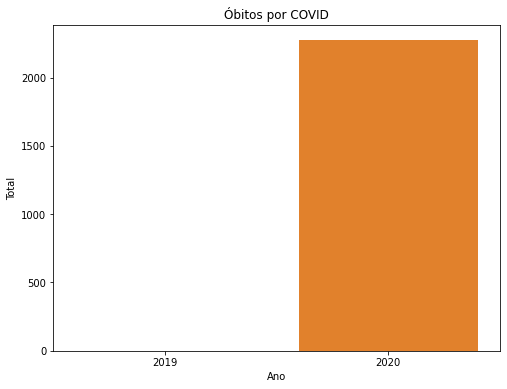

In [52]:
def grafico_comparativo(causa, uf):
    total_2019 = data_2019.query(f"tipo_doenca == '{causa}' and uf == '{uf}'")["total"].sum()
    total_2020 = data_2020.query(f"tipo_doenca == '{causa}' and uf == '{uf}'")["total"].sum()
    lista = [total_2019, total_2020]
    data = pd.DataFrame({"Total" : lista,
                          "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x="Ano", y="Total", data = data)
    plt.title(f"Óbitos por {causa}")
    plt.show()


grafico_comparativo("COVID","RN")

---

Solução do Thiago

In [53]:
t = data_2019.groupby(["uf","tipo_doenca"]).sum()
t

total
uf tipo_doenca                      
AC INDETERMINADA                  37
   INSUFICIENCIA_RESPIRATORIA    219
   OUTRAS                       1998
   PNEUMONIA                     890
   SEPTICEMIA                    419
...                              ...
TO INSUFICIENCIA_RESPIRATORIA    456
   OUTRAS                       3156
   PNEUMONIA                     898
   SEPTICEMIA                    517
   SRAG                            8

[163 rows x 1 columns]

In [54]:
t.loc["SP", "SRAG"]

total    293
Name: (SP, SRAG), dtype: int64

In [55]:
t = data_2020.groupby(["uf","tipo_doenca"]).sum()
t.loc["SP", "SRAG"]

total    2404
Name: (SP, SRAG), dtype: int64

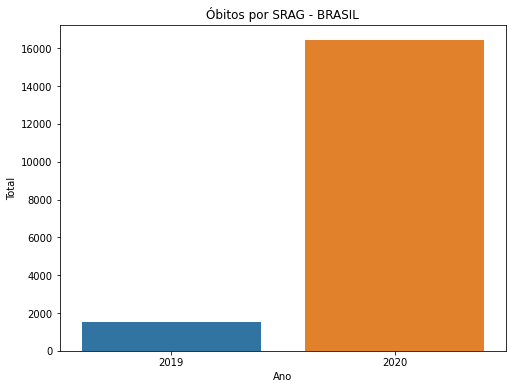

In [56]:
# solucao do Thiago
def grafico_comparativo(causa, estado="BRASIL"):
    if estado == "BRASIL":
        total_2019 = data_2019.groupby("tipo_doenca").sum()
        total_2020 = data_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    else:
        total_2019 = data_2019.groupby(["uf","tipo_doenca"]).sum()
        total_2020 = data_2020.groupby(["uf", "tipo_doenca"]).sum()
        lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]
    
    data = pd.DataFrame({"Total" : lista,
                            "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x="Ano", y="Total", data = data)
    plt.title(f"Óbitos por {causa} - {estado}")
    plt.show()


grafico_comparativo("SRAG")

---
## Desafio 05:  Como você sabe neste curso vamos aprender como criar uma aplicação web para ciência de dados com o Streamlit, que é uma ferramenta de alto nível abstraindo muitas coisas. Entender, mesmo que superficialmente, como uma aplicação-web funciona é interessante para você conhecer o que está acontecendo por baixo dos panos do Streamlit, por isso queremos que você pesquise um pouco sobre como funciona o Web. Neste vídeo o Sérgio Lopes, CTO da Alura faz uma explicação geral de como as coisas acontecem em uma aplicação.

---
## Desafio 06:  A função que melhoramos no vídeo 2.3 da para ficar ainda melhor, agora queremos que você acrescente a opção de selecionar apenas o estado e visualizar os totais de óbitos.

In [57]:
total_2019 = data_2019.groupby("tipo_doenca").sum()
total_2019["total"].sum()

1170610

In [58]:
total_2019 = data_2019.groupby(["uf","tipo_doenca"]).sum()
total_2019.loc[estado].sum()

NameError: name 'estado' is not defined

In [59]:
total_2019

total
uf tipo_doenca                      
AC INDETERMINADA                  37
   INSUFICIENCIA_RESPIRATORIA    219
   OUTRAS                       1998
   PNEUMONIA                     890
   SEPTICEMIA                    419
...                              ...
TO INSUFICIENCIA_RESPIRATORIA    456
   OUTRAS                       3156
   PNEUMONIA                     898
   SEPTICEMIA                    517
   SRAG                            8

[163 rows x 1 columns]

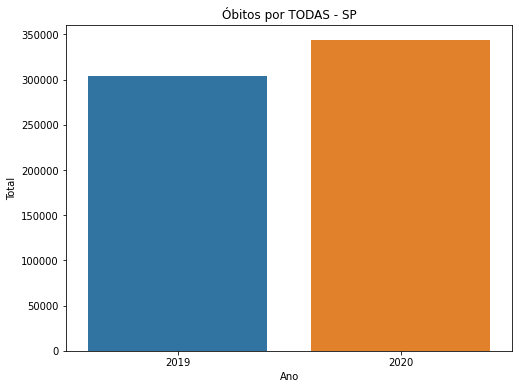

In [60]:
def grafico_comparativo_karol(causa="TODAS", estado="BRASIL"):
    if estado == "BRASIL":
        total_2019 = data_2019.groupby("tipo_doenca").sum()
        total_2020 = data_2020.groupby("tipo_doenca").sum()
        if causa == "TODAS":
            lista = [total_2019["total"].sum(), total_2020["total"].sum()]
        else:
            lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    else:
        total_2019 = data_2019.groupby(["uf","tipo_doenca"]).sum()
        total_2020 = data_2020.groupby(["uf", "tipo_doenca"]).sum()
        if causa == "TODAS":
            lista = [int(total_2019.loc[estado].sum()), int(total_2020.loc[estado].sum())]
        else:
            lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado, causa])]
    
    data = pd.DataFrame({"Total" : lista,
                            "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x="Ano", y="Total", data = data)
    plt.title(f"Óbitos por {causa} - {estado}")
    plt.show()


grafico_comparativo_karol(estado="SP")

---
## Desafio 07 - Nesta aula criamos nossa primeira aplicação com o Streamlit e nosso desafio é que você explore a documentação da ferramenta, entre nos códigos fontes (github) dos exemplos, explore os métodos e afins.

---
## Desafio 08 - Na aula passada pedimos para você explorar a documentação, agora queremos que dê uma olhada nos chamados comandos mágicos do streamlit, como funciona e compartilhe conosco as vantagens e desvantagens que você identificou.

---
## Desafio Extra - Não deixe de ir reproduzindo o código que estamos desenvolvendo na aula para você exercitar e realizar os testes dessa nova ferramenta.

---
## Desafio 09:  Resolver o problema do seaborn no streamlit.

---
## Desafio 10: Tornar o plot do DataFrame opcional, onde o usuário decide se quer ver ou não (Dica: Métodos da API do Streamlit).

In [64]:
def obtendo_dataframes(data_2019, data_2020, causa, estado="BRASIL"):
    if estado == "BRASIL":
        data_sel_2019 = data_2019.query(f"tipo_doenca == '{causa}'")
        data_sel_2020 = data_2020.query(f"tipo_doenca == '{causa}'")
    else:
        data_sel_2019 = data_2019.query(f"tipo_doenca == '{causa}' and uf == '{estado}'")
        data_sel_2020 = data_2020.query(f"tipo_doenca == '{causa}' and uf == '{estado}'")

    return data_sel_2019, data_sel_2020


df1, df2 = obtendo_dataframes(data_2019, data_2020, "OUTRAS", "SP")
df1

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
892,SP,OUTRAS,DOMICILIO,< 9,F,66
893,SP,OUTRAS,DOMICILIO,< 9,I,2
894,SP,OUTRAS,DOMICILIO,< 9,M,108
895,SP,OUTRAS,HOSPITAL,< 9,F,2691
896,SP,OUTRAS,HOSPITAL,< 9,I,53
...,...,...,...,...,...,...
12303,SP,OUTRAS,POSTO_SAUDE,N/I,M,2
12304,SP,OUTRAS,SAMU,N/I,F,1
12305,SP,OUTRAS,VIA_PUBLICA,N/I,F,15
12306,SP,OUTRAS,VIA_PUBLICA,N/I,I,6


---
## Desafio 11: Ler na documentação do StreamLit sobre Fluxo de execução e o método st.cache.

---
## Desafio Extra:  Crie a sua aplicação do Streamlit usando outras análises que você já trabalhou no bootcamp.